# Invisible Labor

**Import Dependencies**

In [44]:
import pandas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Sets up seaborn for graphs to have grids
sns.set(color_codes=True)

Use this cell to import MTurk Data

In [3]:
# Reads in CSV and sets the appropriate column names
df_mturk = pd.read_csv("data/records.csv", names=['ID', 'Current', 'Event', 'Extra', 'Platform', 'Skip', 'Subtype', 'Time', 'Type', 'User'])

Use this cell to import Toloka Data

In [4]:
# Reads in CSV, drops the first row with offset headings, sets new headings, and drops the two irrelevant columns
df_toloka = pd.read_csv("data/telemetry_db.csv")
df_toloka.drop(0)
df_toloka.columns = ['ID', 'Current', 'Event', 'Extra', 'Platform', 'Skip', 'Subtype', 'Time', 'Type', 'User', 'Irrelevant', 'Unused']
df_toloka = df_toloka.drop(columns=['Irrelevant', 'Unused'])

Print Basic information regarding DataFrames

In [5]:
print(df_mturk.info())
df_mturk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496374 entries, 0 to 3496373
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ID        int64  
 1   Current   object 
 2   Event     object 
 3   Extra     object 
 4   Platform  object 
 5   Skip      float64
 6   Subtype   object 
 7   Time      int64  
 8   Type      object 
 9   User      object 
dtypes: float64(1), int64(2), object(7)
memory usage: 266.8+ MB
None


,ID,Current,Event,Extra,Platform,Skip,Subtype,Time,Type,User
0,1,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_LOAD,NaN,OTHER,0.0,OTHER,1588994215395,OTHER,ae862298385abab2a0a1619f8cedef9d
1,2,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_BLUR,NaN,OTHER,0.0,OTHER,1588994217989,OTHER,ae862298385abab2a0a1619f8cedef9d
2,3,https://worker.mturk.com/projects/354DQCRRIJZH...,TAB_CHANGE,NaN,MTURK,0.0,TASK_STARTED,1588994218051,WORKING,ae862298385abab2a0a1619f8cedef9d
3,4,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_FOCUS,NaN,OTHER,0.0,OTHER,1588994221371,OTHER,ae862298385abab2a0a1619f8cedef9d
4,5,https://docs.google.com/forms/d/e/1FAIpQLScvig...,TAB_CHANGE,NaN,OTHER,0.0,OTHER,1588994221397,OTHER,ae862298385abab2a0a1619f8cedef9d


In [6]:
print(df_toloka.info())
df_toloka.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2894936 entries, 0 to 2894935
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ID        int64  
 1   Current   object 
 2   Event     object 
 3   Extra     object 
 4   Platform  object 
 5   Skip      float64
 6   Subtype   object 
 7   Time      float64
 8   Type      object 
 9   User      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 220.9+ MB
None


,ID,Current,Event,Extra,Platform,Skip,Subtype,Time,Type,User
0,495553,https://toloka.yandex.com/task/31577897/0001e1...,PAGE_LOAD,NaN,TOLOKA,0.0,TASK_STARTED,1.290745e+12,WORKING,311ad54dd8763dd3365ea2342627aaf
1,1605885,https://toloka.yandex.com/tasks,TAB_CLOSED,NaN,TOLOKA,0.0,TASKS_LIST,1.351745e+12,SEARCHING,fd978fa116dde1ead273fa5fc7316697
2,0,https://toloka.yandex.com/tasks,PAGE_BLUR,NaN,TOLOKA,NaN,TASKS_LIST,1.642014e+12,SEARCHING,d75e96a84a13b15a1f6291c4c8df8b
3,0,https://sandbox.toloka.yandex.com/es/task/1083...,PAGE_FOCUS,NaN,TOLOKA,0.0,TASK_STARTED,1.642719e+12,WORKING,8d22505d156899a9e716e418221b2d10
4,1,https://sandbox.toloka.yandex.com/es/task/1083...,PAGE_FOCUS,NaN,TOLOKA,0.0,TASK_SUBMITED,1.642719e+12,WORKING,8d22505d156899a9e716e418221b2d10


# DATA CLEANING
- Toloka 'Extra' Column Removal

In [7]:
df_toloka = df_toloka.drop(columns=['Extra'])
df_toloka = df_toloka.dropna()
df_toloka.head()


,ID,Current,Event,Platform,Skip,Subtype,Time,Type,User
0,495553,https://toloka.yandex.com/task/31577897/0001e1...,PAGE_LOAD,TOLOKA,0.0,TASK_STARTED,1.290745e+12,WORKING,311ad54dd8763dd3365ea2342627aaf
1,1605885,https://toloka.yandex.com/tasks,TAB_CLOSED,TOLOKA,0.0,TASKS_LIST,1.351745e+12,SEARCHING,fd978fa116dde1ead273fa5fc7316697
3,0,https://sandbox.toloka.yandex.com/es/task/1083...,PAGE_FOCUS,TOLOKA,0.0,TASK_STARTED,1.642719e+12,WORKING,8d22505d156899a9e716e418221b2d10
4,1,https://sandbox.toloka.yandex.com/es/task/1083...,PAGE_FOCUS,TOLOKA,0.0,TASK_SUBMITED,1.642719e+12,WORKING,8d22505d156899a9e716e418221b2d10
5,2,https://sandbox.toloka.yandex.com/es/task/1083...,PAGE_BLUR,TOLOKA,0.0,TASK_STARTED,1.642719e+12,WORKING,8d22505d156899a9e716e418221b2d10


In [8]:
df_mturk.head()


,ID,Current,Event,Extra,Platform,Skip,Subtype,Time,Type,User
0,1,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_LOAD,NaN,OTHER,0.0,OTHER,1588994215395,OTHER,ae862298385abab2a0a1619f8cedef9d
1,2,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_BLUR,NaN,OTHER,0.0,OTHER,1588994217989,OTHER,ae862298385abab2a0a1619f8cedef9d
2,3,https://worker.mturk.com/projects/354DQCRRIJZH...,TAB_CHANGE,NaN,MTURK,0.0,TASK_STARTED,1588994218051,WORKING,ae862298385abab2a0a1619f8cedef9d
3,4,https://docs.google.com/forms/d/e/1FAIpQLScvig...,PAGE_FOCUS,NaN,OTHER,0.0,OTHER,1588994221371,OTHER,ae862298385abab2a0a1619f8cedef9d
4,5,https://docs.google.com/forms/d/e/1FAIpQLScvig...,TAB_CHANGE,NaN,OTHER,0.0,OTHER,1588994221397,OTHER,ae862298385abab2a0a1619f8cedef9d


### MTURK_SURVEY_DATA CLEANING

In [9]:
df_mturk_survey = pd.read_csv("data/mturk_survey_data.csv")
df_mturk_short = df_mturk_survey[['user_id', 'id', 'Worker ID', 'How many hours daily do you think you dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)', 'How many hours daily would you like to  dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)', 'Please state, what is your hourly wage on Amazon Mechanical Turk? (Approximately) ', 'Please state what is your gender:', 'Please state what is your age:', 'Please state which is the country where you have lived most of your life:', 'Education level','Annual income']].copy()
df_mturk_short = df_mturk_short.rename(columns={'Please state, what is your hourly wage on Amazon Mechanical Turk? (Approximately) ': 'Hourly Wage: Amazon MTurk', 'Please state what is your gender:': 'Gender', 'Please state what is your age:': 'Age', 'Please state which is the country where you have lived most of your life:': 'Country'})
df_mturk_short = df_mturk_short.dropna()
df_mturk_short.head()
df_mturk_short.tail()


,user_id,id,Worker ID,"How many hours daily do you think you dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)","How many hours daily would you like to dedicate to unpaid activities on MTurk? (e.g., searching for work, communicating with Requesters)",Hourly Wage: Amazon MTurk,Gender,Age,Country,Education level,Annual income
93,f4b1f58182ccaef03a28fed5539a89f9,33,A3ATSR1NVX851J,120.0,"I don't know, but certainly not long.",3,Female,25-34 years old,Brazil,High school degree,"$20,000 – $29,999"
94,f7894afaa9c87d30f7b8a102e92479d,12,A2LFQCVQXRGCNE,60.0,60,2,Female,18-24 years old,United States,Bachelor’s degree,"$30,000 – $39,999"
96,fccf29e7a47d097ee4695db8aa1bf5,55,A1K8VUKRL53OX,180.0,120,1.5,Male,25-34 years old,United States,Bachelor’s degree,"$60,000 – $69,999"
97,fd89522795bd36f4ee4ae5f0a11c71,48,A15RNM75ICEC05,240.0,0,2,Male,25-34 years old,India,Bachelor’s degree,"$0 – $9,999"
99,ffb0c8b77e4f393844efa24f5254e9b,14,ASTDBTVY3WP1K,60.0,60,12,Female,35-44 years old,United States,Bachelor’s degree,"$30,000 – $39,999"


### TOLOKA_SURVEY_DATA Cleaning

In [10]:
df_toloka_survey = pd.read_csv("data/toloka_survey_data.csv")
df_toloka_short = df_toloka_survey[['id', 'task_satisfaction', 'task_motivation',  'gender', 'age', 'current_country', 'home_country', 'only_one_country', 'education', 'group']].copy()
df_toloka_short = df_toloka_short.dropna()
df_toloka_short.tail()

,id,task_satisfaction,task_motivation,gender,age,current_country,home_country,only_one_country,education,group
52,8730329beae4e3c6f07876e29dd65e43,Agree,5,Female,65- 74 years old,Russia,Russia,Yes,"Some high school, no diploma",control
53,936b6e5c36ac8753c622dcce8628f7df,Agree,4,Female,25-34 years old,Turkey,Turkey,Yes,Masterâs degree,control
54,3194aea2f94544f712e639fd70daace7,Slightly Agree,5,Female,45-54 years old,Russia,Russia,Yes,"Some high school, no diploma",control
55,846ccdfbbf78b5756bda135fa84cf48,Slightly Agree,5,Male,18-24 years old,Morocco,France,No,Bachelor’s degree,treatment
56,d930ef56f432ac72d960495a69dd8bd2,Slightly Agree,4,Female,25-34 years old,United Kingdom,Hong Kong,No,Master’s degree,treatment


# Description of outcome
We are looking to see how people of a different demographics perform on the toloka and mturk platforms

Text(0.5, 0, 'Workers')

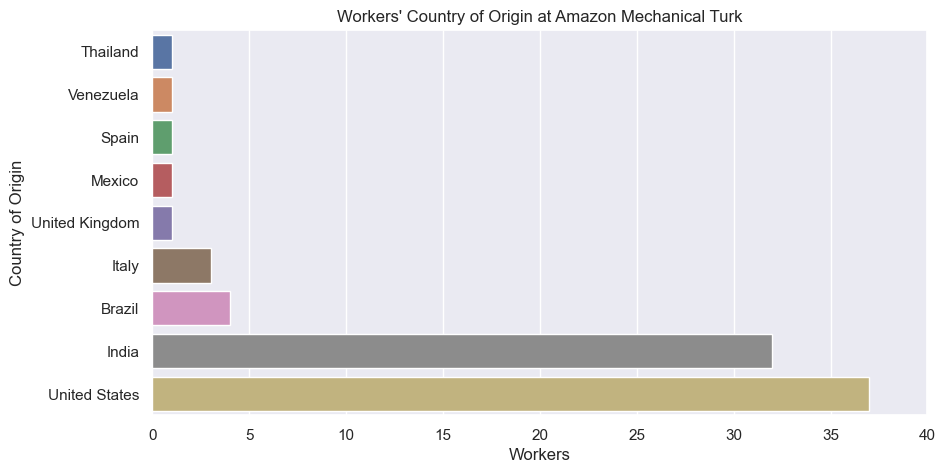

In [67]:
fig, ax_mturk = plt.subplots(1, 1, figsize=(10, 5))
ax_mturk = sns.countplot(y="Country", data=df_mturk_short, order=df_mturk_short['Country'].value_counts(ascending=True).index)
ax_mturk.set_title("Workers' Country of Origin at Amazon Mechanical Turk")
ax_mturk.set_xticks(np.arange(0, 41, 5))
ax_mturk.set_ylabel("Country of Origin")
ax_mturk.set_xlabel("Workers")

Text(0.5, 0, 'Workers')

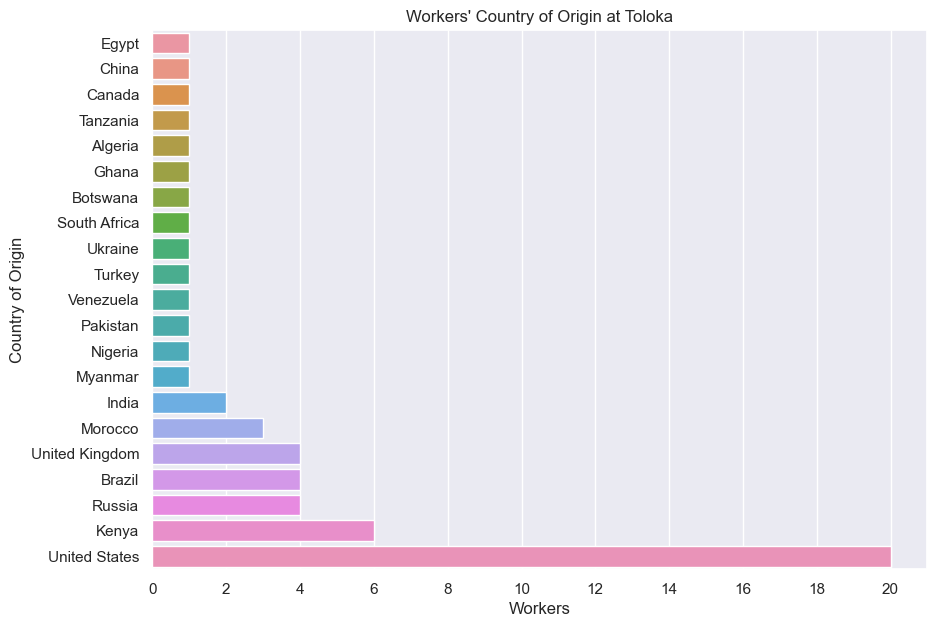

In [70]:
fig, ax_tolo = plt.subplots(1, 1, figsize=(10, 7))
# ax_tolo = sns.countplot(y="home_country", data=df_toloka_short)
ax_tolo = sns.countplot(y="current_country", data=df_toloka_short, order=df_toloka_short['current_country'].value_counts(ascending=True).index)
ax_tolo.set_title("Workers' Country of Origin at Toloka")
ax_tolo.set_xticks(np.arange(0, 21, 2))
ax_tolo.set_ylabel("Country of Origin")
ax_tolo.set_xlabel("Workers")

Text(0.5, 0, 'Workers')

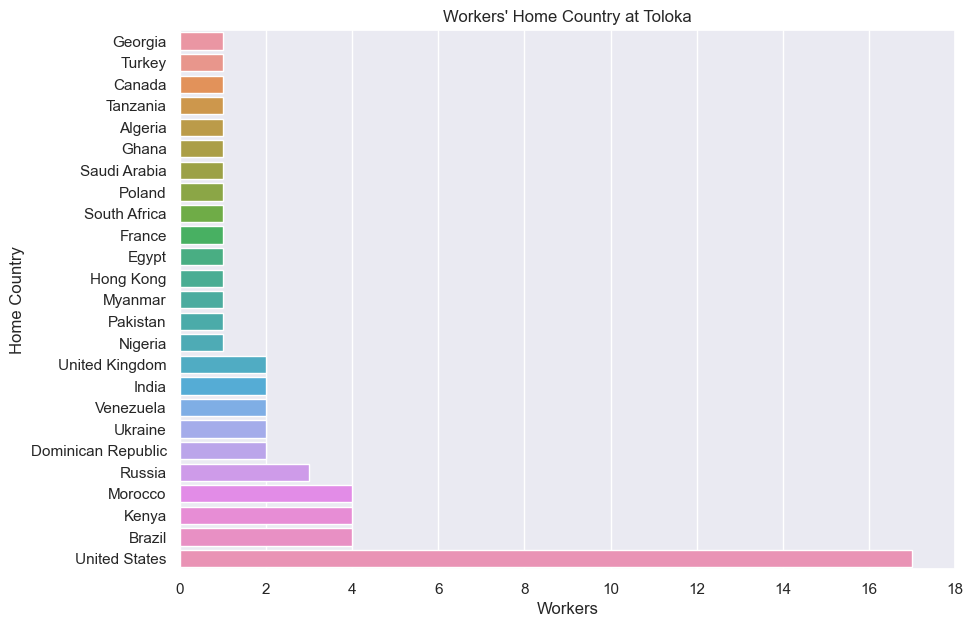

In [64]:
fig, ax_tolo = plt.subplots(1, 1, figsize=(10, 7))
ax_tolo = sns.countplot(y="home_country", data=df_toloka_short, order=df_toloka_short['home_country'].value_counts(ascending=True).index)
ax_tolo.set_title("Workers' Home Country at Toloka")
ax_tolo.set_xticks(np.arange(0, 19, 2))
ax_tolo.set_ylabel("Home Country")
ax_tolo.set_xlabel("Workers")